<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.804806,67.731908,0.002554,161.539268,161.538254,0.001014
1,0.0,1.0,37.535670,40.290157,-0.009498,87.816329,87.822368,-0.006038
2,0.0,2.0,64.313862,39.081543,-0.009178,113.386227,113.393524,-0.007297
3,0.0,3.0,48.196116,99.691170,0.001390,157.888676,157.889061,-0.000385
4,0.0,4.0,76.885147,79.202699,-0.001896,166.085950,166.089836,-0.003886
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.501178,94.860023,-0.001642,150.359560,150.360437,-0.000877
29996,999.0,26.0,40.284055,32.263555,0.003443,82.551053,82.548648,0.002405
29997,999.0,27.0,81.557816,34.553424,0.004921,126.116161,126.112673,0.003488
29998,999.0,28.0,77.312870,66.716195,0.004592,154.033658,154.029495,0.004163


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.804806  67.731908  0.002554  161.539268  161.538254  0.001014
      1.0    37.535670  40.290157 -0.009498   87.816329   87.822368 -0.006038
      2.0    64.313862  39.081543 -0.009178  113.386227  113.393524 -0.007297
      3.0    48.196116  99.691170  0.001390  157.888676  157.889061 -0.000385
      4.0    76.885147  79.202699 -0.001896  166.085950  166.089836 -0.003886
...                ...        ...       ...         ...         ...       ...
999.0 25.0   45.501178  94.860023 -0.001642  150.359560  150.360437 -0.000877
      26.0   40.284055  32.263555  0.003443   82.551053   82.548648  0.002405
      27.0   81.557816  34.553424  0.004921  126.116161  126.112673  0.003488
      28.0   77.312870  66.716195  0.004592  154.033658  154.029495  0.004163
      29.0   22.310911  84.654291  0.001028  116.966230  116.964481  0.001750

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.804806  67.731908  0.002554  161.539268  161.538254  0.001014
      1.0    37.535670  40.290157 -0.009498   87.816329   87.822368 -0.006038
      2.0    64.313862  39.081543 -0.009178  113.386227  113.393524 -0.007297
      3.0    48.196116  99.691170  0.001390  157.888676  157.889061 -0.000385
      4.0    76.885147  79.202699 -0.001896  166.085950  166.089836 -0.003886
...                ...        ...       ...         ...         ...       ...
999.0 25.0   45.501178  94.860023 -0.001642  150.359560  150.360437 -0.000877
      26.0   40.284055  32.263555  0.003443   82.551053   82.548648  0.002405
      27.0   81.557816  34.553424  0.004921  126.116161  126.112673  0.003488
      28.0   77.312870  66.716195  0.004592  154.033658  154.029495  0.004163
      29.0   22.310911  84.654291  0.001028  116.966230  116.964481  0.001750

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.804806,67.731908,0.002554,161.539268,161.538254,0.001014
1,0.0,1.0,37.535670,40.290157,-0.009498,87.816329,87.822368,-0.006038
2,0.0,2.0,64.313862,39.081543,-0.009178,113.386227,113.393524,-0.007297
3,0.0,3.0,48.196116,99.691170,0.001390,157.888676,157.889061,-0.000385
4,0.0,4.0,76.885147,79.202699,-0.001896,166.085950,166.089836,-0.003886
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.501178,94.860023,-0.001642,150.359560,150.360437,-0.000877
29996,999.0,26.0,40.284055,32.263555,0.003443,82.551053,82.548648,0.002405
29997,999.0,27.0,81.557816,34.553424,0.004921,126.116161,126.112673,0.003488
29998,999.0,28.0,77.312870,66.716195,0.004592,154.033658,154.029495,0.004163


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.804806  67.731908  0.002554  161.539268  161.538254  0.001014
      1.0    37.535670  40.290157 -0.009498   87.816329   87.822368 -0.006038
      2.0    64.313862  39.081543 -0.009178  113.386227  113.393524 -0.007297
      3.0    48.196116  99.691170  0.001390  157.888676  157.889061 -0.000385
      4.0    76.885147  79.202699 -0.001896  166.085950  166.089836 -0.003886
...                ...        ...       ...         ...         ...       ...
999.0 25.0   45.501178  94.860023 -0.001642  150.359560  150.360437 -0.000877
      26.0   40.284055  32.263555  0.003443   82.551053   82.548648  0.002405
      27.0   81.557816  34.553424  0.004921  126.116161  126.112673  0.003488
      28.0   77.312870  66.716195  0.004592  154.033658  154.029495  0.004163
      29.0   22.310911  84.654291  0.001028  116.966230  116.964481  0.001750

[30000 rows x 6 columns]

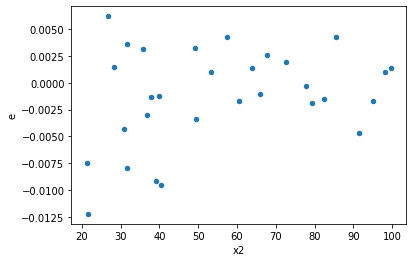

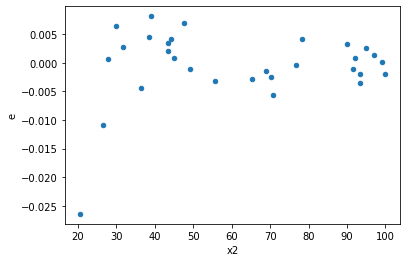

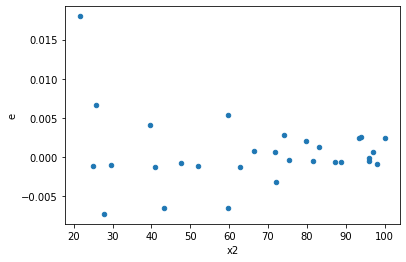

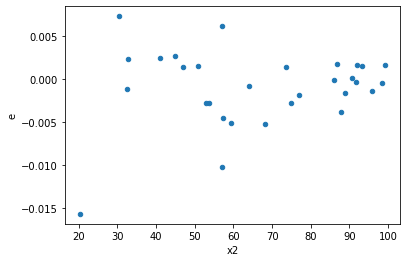

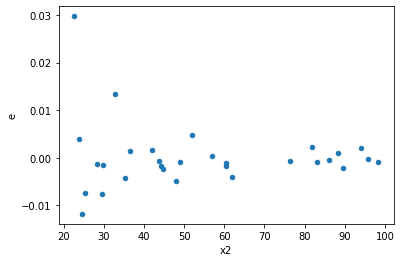

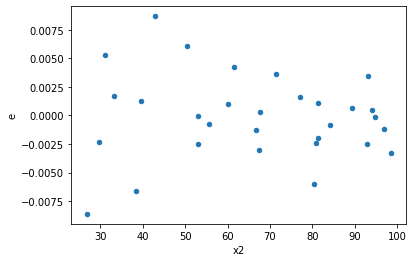

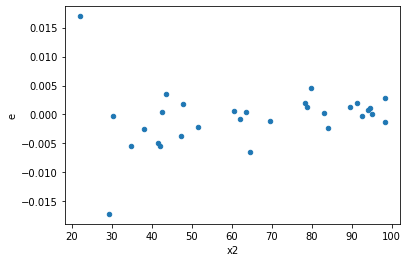

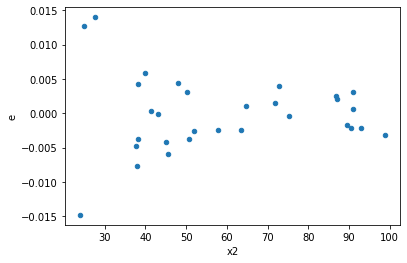

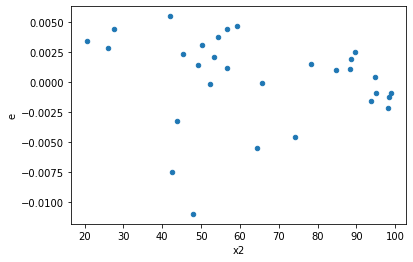

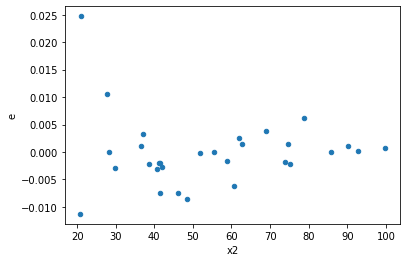

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,13.0,13.0,0.000124888529587389,0.00027539217846860015,9.606809968260693e-06,2.1184013728353858e-05,2.2051038584444083,0.16721524304666535,0.9163923784766673,0.08360762152333268,Reject001=1 : Homoscedasticity
3.0,12.0,14.0,7.200074066578398e-05,0.00045089677215683055,6.0000617221486655e-06,3.220691229691647e-05,5.367763497836642,0.003940030715311682,0.9980299846423442,0.001970015357655841,Reject001=0 : Heteroscedasticity
4.0,13.0,13.0,0.00013295982415876127,0.0010132642306812877,1.0227678781443175e-05,7.794340236009905e-05,7.62083010482471,0.0008262480762124547,0.9995868759618938,0.00041312403810622733,Reject001=0 : Heteroscedasticity
6.0,10.0,16.0,6.246766967082085e-05,0.0006275107825870641,6.246766967082085e-06,3.921942391169151e-05,6.278355526684744,0.0012968015589189807,0.9993515992205405,0.0006484007794594904,Reject001=0 : Heteroscedasticity
7.0,16.0,10.0,0.00012638507582144888,0.0006727682823813124,7.899067238840555e-06,6.727682823813123e-05,8.51705982540874,0.001572460501064965,0.9992137697494675,0.0007862302505324825,Reject001=0 : Heteroscedasticity
9.0,14.0,12.0,0.0001511363296755212,0.0004980010918183799,1.0795452119680084e-05,4.150009098486499e-05,3.844219818196444,0.02475991456959048,0.9876200427152048,0.01237995728479524,Reject001=1 : Homoscedasticity
11.0,12.0,14.0,6.303341512114012e-05,0.000797384179431622,5.252784593428343e-06,5.6956012816544424e-05,10.843013225366406,8.30558513547075e-05,0.9999584720743226,4.152792567735375e-05,Reject001=0 : Heteroscedasticity
13.0,12.0,14.0,8.393014367528107e-05,0.00020879759484827756,6.994178639606756e-06,1.491411391773411e-05,2.132361022819493,0.1780201690898322,0.9109899154550839,0.0890100845449161,Reject001=1 : Homoscedasticity
14.0,16.0,10.0,5.513301490215361e-05,0.0005557164301327322,3.4458134313846006e-06,5.557164301327322e-05,16.127293052817244,9.1841361166356e-05,0.9999540793194168,4.5920680583178e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,13.0,0.000124888529587389,0.00027539217846860015,9.606809968260693e-06,2.1184013728353858e-05,2.2051038584444083,0.16721524304666535,Reject001=1 : Homoscedasticity
1.0,19.0,7.0,0.0009978539097928768,3.909336784712775e-05,5.251862683120404e-05,5.584766835303964e-06,0.10633878249051562,9.707906157987122e-05,Reject001=0 : Heteroscedasticity
2.0,14.0,12.0,0.0002973232573419635,2.2101959768952712e-05,2.1237375524425964e-05,1.8418299807460594e-06,0.08672587526776537,5.766987858335473e-05,Reject001=0 : Heteroscedasticity
3.0,12.0,14.0,7.200074066578398e-05,0.00045089677215683055,6.0000617221486655e-06,3.220691229691647e-05,5.367763497836642,0.003940030715311682,Reject001=0 : Heteroscedasticity
4.0,13.0,13.0,0.00013295982415876127,0.0010132642306812877,1.0227678781443175e-05,7.794340236009905e-05,7.62083010482471,0.0008262480762124547,Reject001=0 : Heteroscedasticity
5.0,15.0,11.0,0.000253325326570306,9.181412047357689e-05,1.6888355104687068e-05,8.346738224870627e-06,0.49423038378403916,0.20404766986529088,Reject001=1 : Homoscedasticity
6.0,10.0,16.0,6.246766967082085e-05,0.0006275107825870641,6.246766967082085e-06,3.921942391169151e-05,6.278355526684744,0.0012968015589189807,Reject001=0 : Heteroscedasticity
7.0,16.0,10.0,0.00012638507582144888,0.0006727682823813124,7.899067238840555e-06,6.727682823813123e-05,8.51705982540874,0.001572460501064965,Reject001=0 : Heteroscedasticity
8.0,13.0,13.0,0.00018522976479612996,0.00015912927430513727,1.4248443445856151e-05,1.2240713408087482e-05,0.8590912722924431,0.788338114346166,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      547
Reject001=0 : Heteroscedasticity    453
Name: Result_test, dtype: int64